# Prophet Prediction Model

<hr>
<p>
Team Name: KANDY<br>
Date: November 06, 2022<br>
Project: Analyzing Information on Car Collision in Canada<br>
Competition: HACKED(beta) 2022 at the University of Alberta<br>
Author: Min Joh <br>
Team Members: Min Joh, Jamie Lee, Taekwan Yoon, Yongbin Kim, Dohyun Kim<br><br>
</p>
<hr>
<p>
Description of file:<br>
This Jupyter Notebook predicts of the number of collisions in Canada from 2020 to 2022. Data is referenced from <i>National Collision Database Online</i>, and used to train Facebook Prophet model. The Facebook Prophet model "works best with time series that have strong seasonal effects and several seasons of historical data. [1]" Hence, this model is selected.
</p>

> National Collision Database Online: https://wwwapps2.tc.gc.ca/Saf-Sec-Sur/7/NCDB-BNDC/p.aspx?l=en
> Facebook Prophet: https://facebook.github.io/prophet/

# 0. Setups

## 0.1. Importing Modules

Since Google Colab did not install the Facebook Prophet module, the user has to install using the cell below.

In [ ]:
# installing Facebook Prophet Prediction Module
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing modules
import os
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from fbprophet import Prophet                       # prediction model
from sklearn.metrics import mean_squared_error # acuracy test
import plotly.graph_objects as go                    # plot

The data set is brought from this share drive, so the user should run this cell below to mount the drive.

In [ ]:
# integrating this share drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 0.2. Loading Data

In [ ]:
def load_data(foler_path, filename):
    data = os.path.join(foler_path, filename)
    dataframe = pd.read_csv(data)
    return dataframe

In [ ]:
data_path = '/content/drive/Shareddrives/KANDY-hacked-beta/Data_Sets'
collision_df = load_data(data_path, "canada_collisions_statistics.csv")

# data frame modification
collision_df = collision_df.rename(columns= {"Unnamed: 0": "Year", "Measures": "Month"})
collision_df = collision_df.iloc[1: , :]
collision_df.insert(0, "Date", pd.to_datetime(collision_df['Year'].astype(str) + collision_df['Month'], format='%Y%B'))

Because the data file does not have date column formatted as YYYY-MM-DD, the data is modified in its data frame. As shown below, the <code>canada_collisions_statistics.csv</code> is well-written with inserted <i>Date</i> column.

In [ ]:
collision_df.tail(12)

,Date,Year,Month,Number of collisions,Number of vehicles,Number of persons,Number of injured,Number of fatalities
241,2019-01-01,2019,January,9713.0,17467.0,24428.0,12756.0,115.0
242,2019-02-01,2019,February,8327.0,15803.0,22026.0,11229.0,93.0
243,2019-03-01,2019,March,7480.0,13519.0,19274.0,10101.0,95.0
244,2019-04-01,2019,April,6787.0,12213.0,17229.0,9058.0,98.0
245,2019-05-01,2019,May,8037.0,14510.0,20002.0,10572.0,135.0
246,2019-06-01,2019,June,9328.0,16876.0,23532.0,12325.0,173.0
247,2019-07-01,2019,July,9596.0,17180.0,24501.0,12970.0,191.0
248,2019-08-01,2019,August,9371.0,17045.0,24338.0,12733.0,202.0
249,2019-09-01,2019,September,9122.0,16645.0,23033.0,11961.0,161.0
250,2019-10-01,2019,October,9614.0,17324.0,24327.0,12686.0,176.0


## 0.3. Plot of Original Data

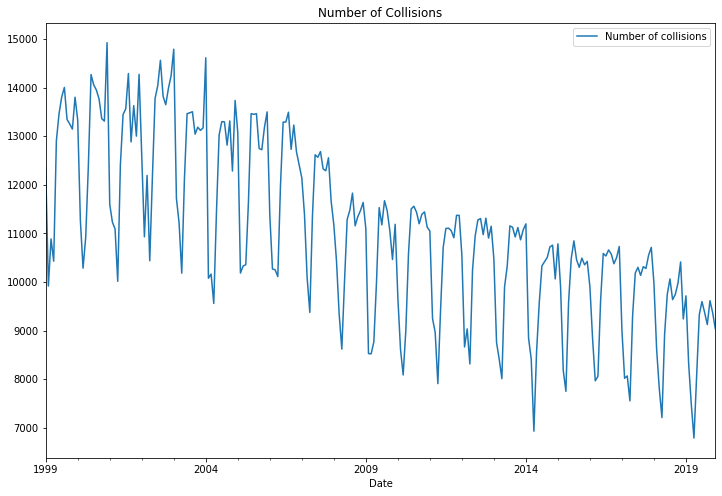

In [ ]:
collision_df.plot(x='Date', y='Number of collisions', kind='line', figsize=(12, 8), title="Number of Collisions")
plt.show()

A simople

# 1. Prophet Modelling

The user can adjust the parameters in <code>Prophet()</code> function to minimize the errors. The process of training and prediction is coded using methods in order to do multiple experimental predictions on the other factors such as the number of fatalities.

In [ ]:
def make_prophet_dataframe(dataframe, column_name):
    ''' creating dataframe for prophet prediction '''
    df = pd.DataFrame()
    df['ds'] = dataframe['Date']
    df['y'] = dataframe[column_name]
    return df

def train_test_split(dataframe, test_years):
    idx = test_years * -12  # year * month from latest
    train_df = dataframe.drop(dataframe.index[idx:])
    test_df = dataframe['y'][idx:]
    return train_df, test_df

def forecast(dataframe):
    ''' training model '''
    model = Prophet(growth='linear',
                    changepoint_prior_scale=0.05,    # flexibility
                    changepoint_range=0.80,          # percentage of size of training set
                    daily_seasonality=False,
                    weekly_seasonality=False,)
    model.fit(dataframe)

    ''' creating forecasted dataframe '''
    future = model.make_future_dataframe(periods = 48, freq='MS')    # predict 48 months
    forecast = model.predict(future)
    return model, forecast

In [ ]:
df1 = make_prophet_dataframe(collision_df, 'Number of collisions')
[train1, test1] = train_test_split(df1, 4)
[model1, forecast1] = forecast(train1)

#df2 = make_prophet_dataframe(collision_df, 'Number of vehicles')
#[model2, forecast2] = forecast(df2)

#df3 = make_prophet_dataframe(collision_df, 'Number of persons')
#[model3, forecast3] =forecast(df3)

#df4 = make_prophet_dataframe(collision_df, 'Number of injured')
#[model4, forecast4] =forecast(df4)

df5 = make_prophet_dataframe(collision_df, 'Number of fatalities')
[train5, test5] = train_test_split(df5, 4)
[model5, forecast5] =forecast(train5)

# 2. Performance Validation

The root mean squared error gives a general interpretation of the accuracy on predictions for both data sets. The predictions are confirmed with the graphs that they are accurate with the seasonality and the trend. Therfore, this model is useful to predict the number of collisions happening in Canada.

RMSE 1: 427.18962962660544
RMSE 2: 33.87585688414015


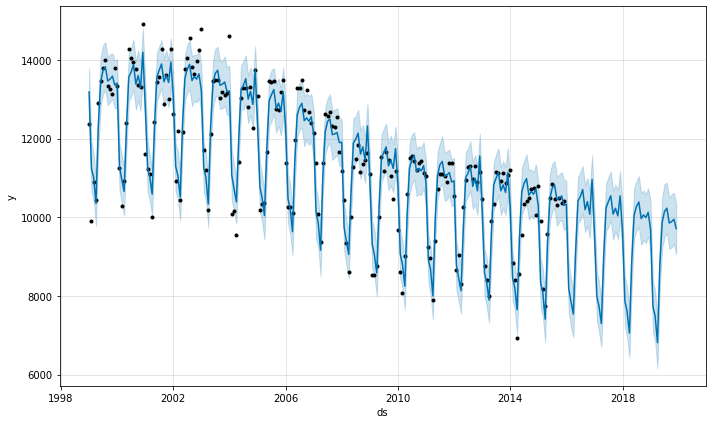

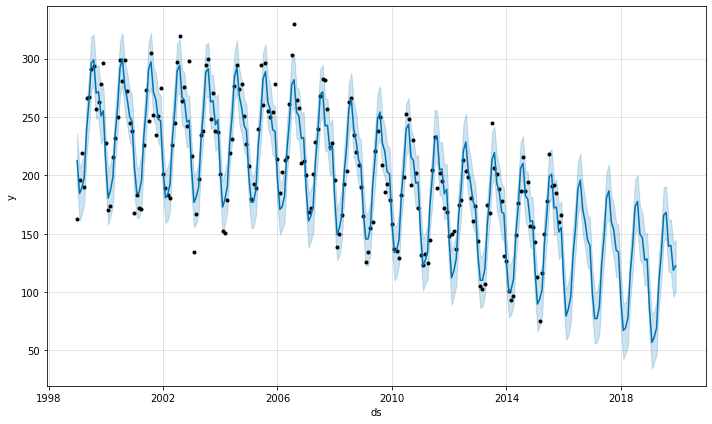

In [ ]:
fig1 = model1.plot(forecast1)
mse1 = sqrt(mean_squared_error(test1, forecast1['yhat'][-48:].values))
print(f"RMSE 1: {mse1}".format(mse1))
#fig2 = model2.plot(forecast2)
#fig3 = model3.plot(forecast3)
#fig4 = model4.plot(forecast4)
fig5 = model5.plot(forecast5)
mse5 = sqrt(mean_squared_error(test5, forecast5['yhat'][-48:].values))
print(f"RMSE 2: {mse5}".format(mse5))

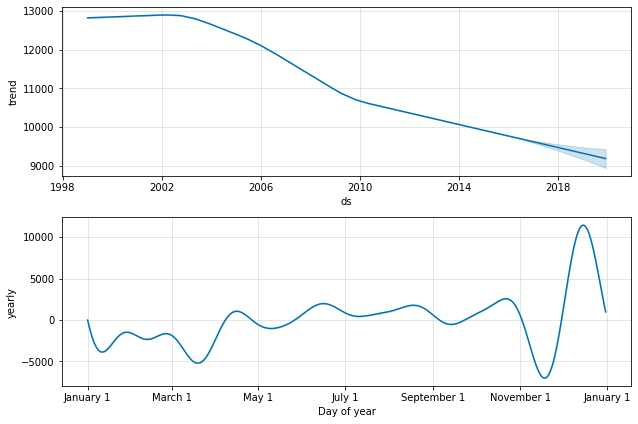

In [ ]:
fig_component1 = model1.plot_components(forecast1)    # trend, weekly, yearly

# 3. Interactive Plot

A user-friendly plot of two line graphs is here. The interactive plot is generated using <i>Plotly</i> module. It shows the actual and predicted data to compare how well it forecasted. The user can zoom or slide on the plot.

> Plotly: https://plotly.com/python/


In [ ]:
# plot data and type
fig = go.Figure()

# Actual Data
fig.add_trace(go.Scatter(
    x=collision_df['Date'], y=collision_df['Number of collisions'],
    mode='lines',
    name="actual",
    line=dict(color='#2B616D'),     # dark teal
    hovertemplate = ""
))

# Predicted Data
fig.add_trace(go.Scatter(
    x=forecast1['ds'], y=forecast1['yhat'],
    mode='lines',
    name="predicted",
    line=dict(color='#FFB52E'),     # bright orange
    hovertemplate = ""
))

# plot style
fig.update_layout(
    # x-axis 
    xaxis=dict(
        title="Time",
        showline=True,
        linewidth=1,
        linecolor='black',
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(count=5, label="5y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
    ),
    # y-axis
    yaxis=dict(
        title="Number of Collisions",
        showline=True,
        fixedrange=False,
        linewidth=1,
        linecolor='black'
    ),
    # plot background
    plot_bgcolor="white",
    # label mode
    hovermode="x",
    showlegend=True
)

print("Figure has been created.")
fig.show()

Figure has been created.


# References

[1] Meta Open Source, "Prophet | Forecasting at Scale." facebook.github.io. https://facebook.github.io/prophet/ (accessed Nov. 06, 2022).